<a href="https://colab.research.google.com/github/lucaseduardo79/le79repo/blob/master/FronteiraEficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Conceito de fronteira eficiente : Dado um conjunto de ações é possível combiná-las formando infinitas diferentes carteiras.

 

O retorno projetado de uma carteira é a média dos retornos projetados das ações que a compõem (média ponderada pela participacao de cada componente).

 

O risco de uma carteira é obtido pela multiplicação da matriz de pesos pela de covarianças. 


 


Efficient frontier concept: Given a set of actions it is possible to combine them forming infinite different portfolios.

 

The projected return of a portfolio is the average of the projected returns of the shares that compose it (average weighted by the participation of each component).

 

The risk of a portfolio is obtained by multiplying the weight matrix by the covariance matrix. 

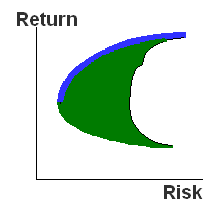

https://economatica.com/support/manual/portugues/Otimizacao_de_carteiras/Fronteiras_e_restricoes.htm

In [2]:

### Itaú Unibanco (ITUB4)
### Banco do Brasil (BBAS3)
### Gerdau (GGBR4)
### Copasa (CSMG3)


assets = ['ITUB4.SA','BBAS3.SA','GGBR4.SA','CSMG3.SA']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a,data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,ITUB4.SA,BBAS3.SA,GGBR4.SA,CSMG3.SA
Date,,,,
2020-07-27,27.799999,34.910000,17.840000,55.279999
2020-07-28,27.639999,35.029999,17.730000,54.560001
2020-07-29,28.290001,35.950001,17.990000,54.200001
2020-07-30,27.809999,34.799999,17.740000,53.779999
2020-07-31,26.889999,33.580002,17.450001,54.549999


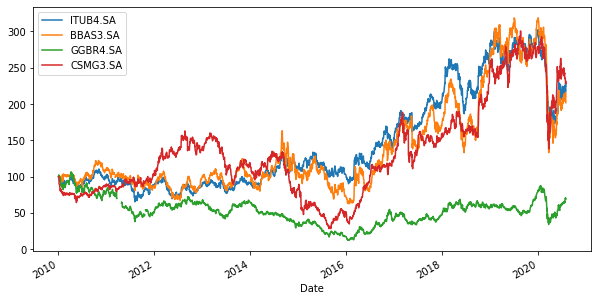

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
#Obtendo o retorno Logarítmico 
#Getting the logarithmic return
log_returns = np.log(pf_data  / pf_data.shift(1))

In [6]:
#Obtendo o retorno médio anual
#Getting the annual mean 
log_returns.mean() * 250

ITUB4.SA    0.074476
BBAS3.SA    0.072874
GGBR4.SA   -0.023227
CSMG3.SA    0.084449
dtype: float64

In [7]:
#Obtendo a matriz de Covariância
#Getting the Covariance Matrix
log_returns.cov() * 250

,ITUB4.SA,BBAS3.SA,GGBR4.SA,CSMG3.SA
ITUB4.SA,0.100445,0.100549,0.069437,0.040286
BBAS3.SA,0.100549,0.180697,0.090035,0.057123
GGBR4.SA,0.069437,0.090035,0.201442,0.045868
CSMG3.SA,0.040286,0.057123,0.045868,0.160894


In [8]:
#Obtendo a matriz de Correlação
#Getting the Correlation Matrix
log_returns.corr() 

,ITUB4.SA,BBAS3.SA,GGBR4.SA,CSMG3.SA
ITUB4.SA,1.000000,0.745555,0.488231,0.316779
BBAS3.SA,0.745555,1.000000,0.470775,0.334884
GGBR4.SA,0.488231,0.470775,1.000000,0.253051
CSMG3.SA,0.316779,0.334884,0.253051,1.000000


In [9]:
#Obtendo o número de ativos na carteira
#Getting the number of assets in the portfolio
num_assets = len(assets)

In [10]:
## Gerando Pesos aleatórios
## Generating random weights
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.06041113, 0.42439013, 0.46383103, 0.05136771])

In [11]:
#Conferindo se a soma dos pesos é igual a um
#Checking if the sum of the weights is one

weights[0] + weights[1] + weights[2] + weights[3] 

1.0

In [12]:
pfolio_returns = []
pfolio_volatilities = []

In [13]:
for x in range (1000):
  
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
#Aplicando a fórmula do Retorno esperado
  pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
#Aplicando a fórmula do Risco  esperado
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.0483477 , 0.05559998, 0.05480413, 0.07192284, 0.05540876,
        0.0425344 , 0.04165452, 0.07235091, 0.05857108, 0.05115001,
        0.04917496, 0.04594261, 0.04057525, 0.05940476, 0.05608333,
        0.06473359, 0.07343292, 0.07114804, 0.04912017, 0.04307518,
        0.05365908, 0.07347188, 0.03527572, 0.04904432, 0.02962138,
        0.06063695, 0.03898643, 0.05596647, 0.05117782, 0.04190035,
        0.05110121, 0.03720816, 0.02443074, 0.02206137, 0.04186534,
        0.03824273, 0.03793462, 0.03577176, 0.05558499, 0.0285416 ,
        0.06890365, 0.05875273, 0.04706957, 0.07398941, 0.07884281,
        0.05020848, 0.07509847, 0.06454041, 0.0598006 , 0.06651036,
        0.05133423, 0.0629496 , 0.06500024, 0.07666085, 0.04281918,
        0.02761884, 0.05232464, 0.03652754, 0.0498089 , 0.04592259,
        0.04948251, 0.05735102, 0.07578433, 0.04947642, 0.03041465,
        0.06956743, 0.05565397, 0.06351432, 0.0488213 , 0.05209773,
        0.06744036, 0.05271598, 0.05061962, 0.07

In [14]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

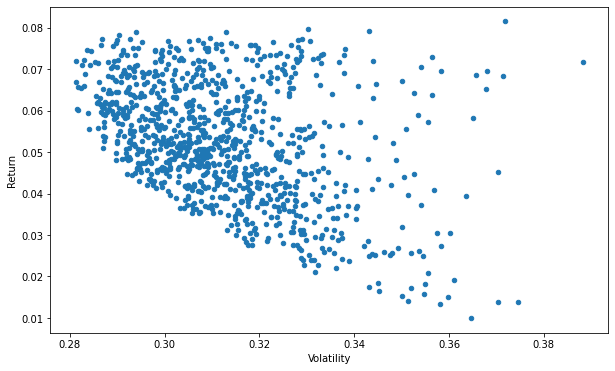

In [15]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10,6))